# The Perceptron

The *Perceptron* is on of the simplest Artificial neural network architectures, proposed in 1957 by Frank Rosenblatt. It is based on a *threshold logic unit (TLU)* and it computes a weighted sum of its inputs

$$ z = w_1x_1 + \cdots + w_nx_n = \textbf{x}^{\intercal}\textbf{w} $$

then applies a step function to that sum and outputs the result: $h_w(\textbf{x})=\text{step}(\textbf{x})$. One of the most common step function used is the *Heaviside step function*

$$ \text{heaviside}(z) = \begin{cases} 0 & \text{if } z<0 \\ 1 & \text{if } z\gt0 \end{cases}$$

A single TLU can be used for binary classification; it computes a linear combination of its inputs and if the output reaches a threshold, it outputs a positive class, otherwise outputs the negative class.

A perceptron is composed of a single layer of TLUs, with each TLU connected to all the inputs. When all the neurons in a layer are connected to every neuron in the previous layer the layer is called a *fully connected* or *dense* layer. *Input Neurons* are simple inputs that output whatever they are fed and all input neurons form the *input layer*. A bias neuron is generally added, tipycally represented by a *bias neuron*, which outputs 1 all the time. (e.g. architecture pg 286 fig 10-5)

We can then write the outputs of a fully connected layer as 
$$ h_{\textbf{W, b}}(\textbf{X}) = \phi(\textbf{XW + b})$$
Where
- $\textbf{X}$ is the matrix of input features (one row per instance, one col per feature)
- $\textbf{W}$ contains the connection weights, except the ones from the bias neuron (one row per input neuron, one column per artificial neuron in the layer)
- $\phi$ is called the *activation function* (when the neurons are TLU, this is a step function)

The perceptron learning rule reinforces connections between neurons tha help reduce the error: the perceptron is fed one training instance at a time, and for each instance it makes its predictions. For every output neuron that produced a wrong predictions, it reinforces the connection weights from the inputs that would have contributed to the correct prediction

$$ w_{i,j}^{\text{next step}} = w_{i,j} +\eta(y_j - \hat{y_j})x_i$$

where 
- $w_{i,j}$ is the weight between ith input neuron and jth output neuron
- $x_i$ is the ith input value of the current training instance
- $\hat{y_j}$ is the output of the jth output neuron 
- $y_j$ is the target output of the jth ouptut neuron
- $\eta$ is the learning rate

# The multilayer perceptron and backpropagation

An MLP consistis of one input layer, one or more layers of TLUs (called *hidden layers*) and one final layer of TLUs called the *output layer*. Every except the output layer includes a bias neuron and is fully connected to the next layer.

To train an MLP, we use [backpropagation](https://homl.info/44). In short, it is Gradient Descent and it is able to compute the gradient of the network's error with regard to every single model parameter, thus it is able to find out how much it should tweak each connection weight and bias in order to reduce the error. This process is called *autodiff*, appendix D has more info on it.

Here's how it works
- It handles one mini-batch at a time (e.g. 32 instances) and goes through the training set multiple times, each pass is called an *epoch*
- Each mini-batch is passed is passed to the network's input layer, which sends it to the first hidden layer. The algorithm then computes the outputs of this layer and passes it to the next layer, and so on, until we get the output of the output layer. This is called a *forward pass* and the intermediate results are saved
- Next we calculate the network's output error (using some loss function)
- Then it computs how much each output connection contributed to the error (done using chain rule)
- The algorithm then measures how much of these error contributions came from each connection in the layer below until it reaches the input layer
- Finally, it performs a gradient descent step to tweak all the connection weights in the network

One change that had to be made to the original MLP architecture was replacing the step function with the logistic function $\sigma(z) = 1 / (1 +\exp(-z))$, this allows for gradients to be computed as it is a smooth function.

Some other choices of function are:
- Hyperbolic tan $\tanh(z) = 2\sigma(2z) - 1$

Another S-shaped function, continues and differentiable. Its outputs are in the range -1 to 1, making each layer's output more or less centered around 0 at the beginning of training, which helps speed up convergence.

- Rectified Linear unit $ReLU(z) = \max(0,z)$

Continuous but not differentiable at $z=0$, however it works very well and has become the default.

Activation functions are useful because they can add non-linearity to each layer. Recall that a linear transformation of linear transformations is also linear. Using a non-linear function allows for an MLP to learn more complex patterns.

## Regression MLPs

To use MLP for regression we use an output neuron for each value we want to predict. In the univariate case (e.g. predicting house price) only a single output neuron is needed. 

For multivariate problems, you need one output neuron per output dimension. For example to locate the center of an object in an image, you need to predict 2D coordinates, thus 2 output neurons. If you also want to place a bounding box around the object, you need two more numbers, the width and height of the object. In total, 4 output neurons.

In general we do not want to use any activation function for output neurons so they are free to output any range of values. To guarantee the range of values is always positive, use ReLU or *softplus*, which is a smooth variant of ReLU: $\text{softplus}(z) = \log(1 + \exp(z))$. 
Finally if we want to guarantee the predictions will fall between a range of values we can use the logistic or hyperbolic tangent function, scaling the labels to the appropriate values.

The typical loss function used is MSE, however if you have a lot of outliers in your training set you may want to use the mean absolute error instead. Alternatively use [Huber loss](https://en.wikipedia.org/wiki/Huber_loss), which is a combination of both.


Typical regression MLP architecture

| Hyperparameter | Typical value |
|     ---        |      ---      |
|# input neurons | One per input feature (e.g. 28x28=784 for MNIST) | 
|# hidden layers | Variable (typically 1 to 5) |
|# neurons per hidden layers | Variable (typically 10 to 100) |
|# output layer | 1 per prediction dimension |
|Activation function | $\begin{cases} 
                        \text{None} & \text{ for any range of values } \\ 
                        ReLU/\text{softplus} & \text{ positive outputs }\\
                        \text{logistic/tanh} & \text{ bounded outputs}
                        \end{cases}$ |
|Loss Function | MSE or MAE/Huber (if outliers)|

## Classification MLPs

For binary classification, we just need a single output neuron using the logistic activation function. The output will be in the range 0 - 1 and we can interpret it as an estimated class probability of the positive class. The estimated probability for the negative class is one minus that number.

MLPs can also be used for multilabel binary classification. For example, in an e-mail classification system that tags messages as spam/ham and urgent/non-urgent we would use two output neurons with the logistic function. The first outputs the probability that the e-mail is spam and the second the probability the e-mail is urgent. 
More generally, we use one output neuron for each positive class.

For multiclass calssification (e.g. identifying digit classes 0 through 9), then we need one output neuron per class and should use the softmax activation to ensure estimated probabilities are between 0-1 and they add up to 1.

For the loss function, since we're preducting probability distributions, the cross-entropy loss is generally a good choice

Typical classification MLP architecture

| Hyperparameter | Binary Classification | Multilabel Binary Classification | Multiclass Classification | 
| --- | --- | --- | --- |
|# input neurons | One per input feature | One per input feature | One per input feature |
|# hidden layers | Variable (typically 1 to 5) | Variable (typically 1 to 5) | Variable (typically 1 to 5) |
|# neurons per hidden layers | Variable (typically 10 to 100) | Variable (typically 10 to 100)| Variable (typically 10 to 100)|
|# output neurons | 1 | 1 per label | 1 per class |
|Activation Function| Logistic | Logistic | Softmax |
|Loss Function | Cross Entropy | Cross Entropy | Cross Entropy |

# Exercise 1
Play around in the [Tensorflow Playground](https://playground.tensorflow.org) to get a better feeling for ANNs and explore the following:

# Implementing MLPs with Keras

## Building an Image Classifier using the Sequential API

In this chapter, we will tackle Fashion MNIST, which is a drop-in replacement of MNIST. The images represent fashion items instead of digits, so each class is more diverse.

In [4]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
X_train_full.shape

(60000, 28, 28)

Data is loaded as ints in the range from 0 to 255. Let's create a validation set and scale the features

In [7]:
X_train_full.dtype

dtype('uint8')

In [9]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [13]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

We need to map the target values to their actual class as well

In [14]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Creating the model using the Sequential API
We'll start by creating a classification MLP with two hidden layers

In [17]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten(input_shape=[28,28])) # Converts inputs to 1D array
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

Using TensorFlow backend.


The Sequential API is the simplest kind of model for NNs that are just composed of a single stack of layers connected sequentially. Another way to write the same model could be as follows

In [18]:
model = Sequential([
    Flatten(input_shape=[28,28]),
    Dense(300, activation='relu'),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax'),
])

We can vew a definition of the model by using summary()

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_5 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Since the model has a lot of parameters, it has a lot of flexibility to train the data. However this also means that it runs the risk of overfitting, especially when we don't have much training data.

We can view a model's Layers

In [21]:
model.layers

In [22]:
hidden1 = model.layers[1]
hidden1.name

'dense_4'

As well as it's weights and biases

In [24]:
weights, biases = hidden1.get_weights()
weights

array([[-0.02856481, -0.07011875,  0.01708196, ..., -0.04368379,
        -0.00595396,  0.05870846],
       [ 0.04723977, -0.02109544, -0.02315624, ...,  0.00892232,
         0.05672345, -0.0205122 ],
       [-0.06727037, -0.0411685 ,  0.02038333, ..., -0.04774668,
        -0.03081633, -0.04496842],
       ...,
       [-0.06352663,  0.03185631,  0.04740191, ...,  0.00362604,
        -0.0219669 ,  0.03039532],
       [ 0.03102626, -0.02586513,  0.07019496, ...,  0.00816435,
        -0.03722331, -0.05957384],
       [ 0.06609361, -0.03666897,  0.05830039, ...,  0.05513498,
        -0.00119662,  0.02499477]], dtype=float32)

In [25]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

Note the weights are initialized randomly (to break simmetry) and the biases set to zero. To use other initialization methods we can set the ```kernel_initializer``` or ```bias_initializer``` when creating the layer.

Next we compile the model

In [27]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'sgd',
              metrics = ['accuracy'])

We use ```sparse_categorical_crossentropy``` because we have sparse labels (i.e. for each instance there is only a single target class) and the classes are exclusive. If instead we had one target probability per class for each instance  (such as one-hot vectors for a single class) we'd use ```categorical_crossentropy``` instead. 

The optimizer set to ```sgd``` means we'll train the model using simple stochastic gradient descent. 

Finally, we can fit the model

In [28]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 4s 80us/step - loss: 0.7262 - accuracy: 0.7611 - val_loss: 0.5066 - val_accuracy: 0.8322
Epoch 2/30
55000/55000 [==============================] - 4s 73us/step - loss: 0.4928 - accuracy: 0.8289 - val_loss: 0.4445 - val_accuracy: 0.8532
Epoch 3/30
55000/55000 [==============================] - 4s 74us/step - loss: 0.4471 - accuracy: 0.8426 - val_loss: 0.4292 - val_accuracy: 0.8564
Epoch 4/30
55000/55000 [==============================] - 4s 73us/step - loss: 0.4203 - accuracy: 0.8529 - val_loss: 0.3952 - val_accuracy: 0.8706
Epoch 5/30
55000/55000 [==============================] - 4s 78us/step - loss: 0.3999 - accuracy: 0.8597 - val_loss: 0.3852 - val_accuracy: 0.8714
Epoch 6/30
55000/55000 [==============================] - 4s 72us/step - loss: 0.3812 - accuracy: 0.8656 - val_loss: 0.4074 - val_accuracy: 0.8552
Epoch 7/30
55000/55000 [==============================] - 4s 77us/ste

Note: instead of passing a validation set, you can also set the ```validation_split``` argument of the ```fit``` method to the ratio of the training set you want Keras to use for validation. 

If the training set is very skewed, with some classes being underrepresented, it can be useful to set the ```class_weight``` parameter, this would give larger weight to underrepresented classes and a lower weight to overrepresented classes.

If you need per instance weights, the ```sample_weight``` can be used. Per-instance weights can be useful if some instances are labelled by experts while others were labeled using a crowdsourcing platform: we might want to give more weights to the former.

We can access the ```history.history``` to access the loss and accuracy of the model

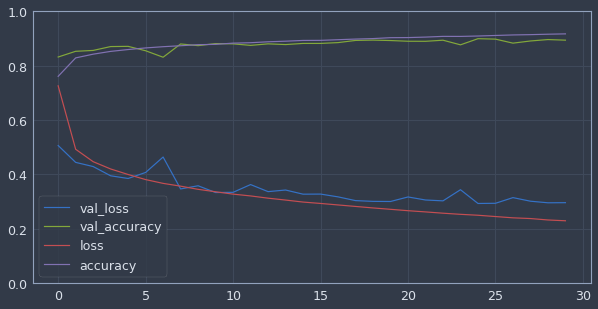

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()

pd.DataFrame(history.history).plot(figsize=(10, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

It looks like the model performed better on the validation set than on the training set at the beginning, but this is not true.

The validation error is computed at the *end* of each epoch while the training error is computed using a running mean *during* each epoch. So the training curve should actually be shifted half an epoch to the left. 